## Classification prediction on whether an individual has heart disease

### Introduction

### Methods & Results

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# Source: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

url <- "https://raw.githubusercontent.com/zjz02/DSCI-100-Group_41/main/heart_cleveland_upload.csv"

In [3]:
heart_data <- read_csv(url)

Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
clean_data <- heart_data |>
           select(age, sex, cp, trestbps, chol, restecg, thalach, exang, condition) |>
           mutate(condition = as_factor(condition))

In [5]:
set.seed(41)

hd_split <- initial_split(clean_data, prop = 0.75, strata = condition)
hd_training <- training(hd_split)
hd_testing <- testing(hd_split)

In [6]:
nrow(hd_training)

[1] 222

There are a total of 222 observations in the dataset.

In [7]:
summary(hd_training)

      age             sex               cp          trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.00   Min.   :100.0  
 1st Qu.:49.00   1st Qu.:0.0000   1st Qu.:1.25   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :2.00   Median :130.0  
 Mean   :54.86   Mean   :0.6622   Mean   :2.14   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:3.00   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.00   Max.   :180.0  
      chol          restecg         thalach          exang        condition
 Min.   :126.0   Min.   :0.000   Min.   : 71.0   Min.   :0.0000   0:120    
 1st Qu.:211.0   1st Qu.:0.000   1st Qu.:132.2   1st Qu.:0.0000   1:102    
 Median :241.5   Median :2.000   Median :151.0   Median :0.0000            
 Mean   :246.5   Mean   :1.023   Mean   :148.2   Mean   :0.3468            
 3rd Qu.:275.0   3rd Qu.:2.000   3rd Qu.:163.0   3rd Qu.:1.0000            
 Max.   :564.0   Max.   :2.000   Max.   :202.0   Max.   :1.0000            

#### Visualization of Original Training Data

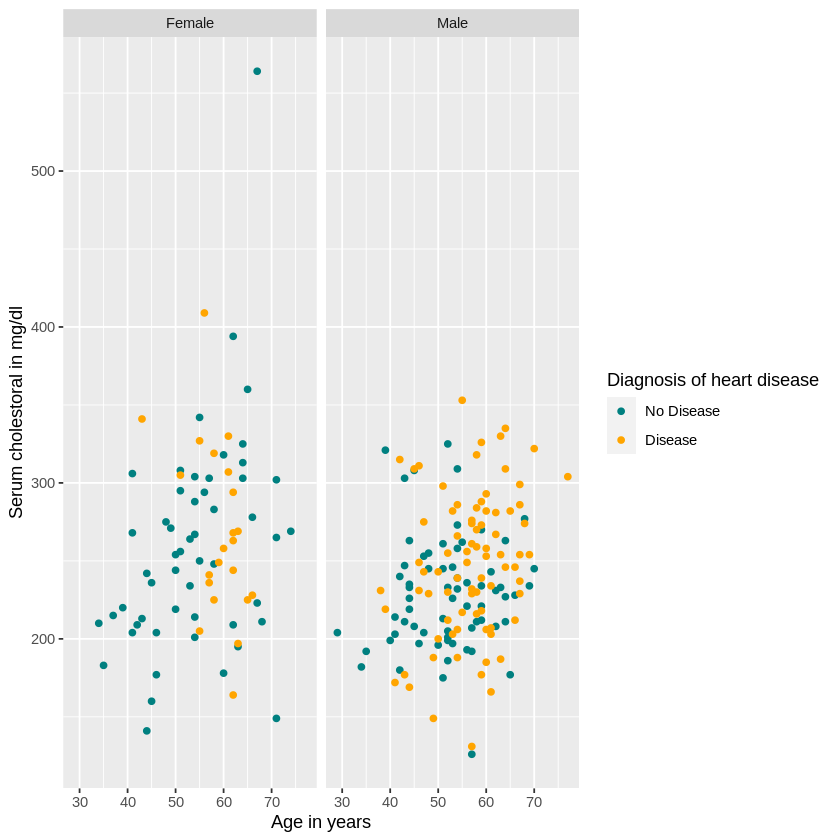

In [8]:
hd_chol_plot <- ggplot(hd_training, aes(x = age, y = chol, group = condition, color = condition)) +
             geom_point() +
             labs(x = "Age in years", y = "Serum cholestoral in mg/dl", colour = "Diagnosis of heart disease") +
             facet_grid(cols = vars(sex), labeller = labeller(sex = c("1" = "Male", "0" = "Female"))) +
             scale_color_manual(labels = c("0" = "No Disease", "1" = "Disease"), values = c("#008080", "#FFA500"))
hd_chol_plot

There are more orange data points for males, representing more heart disease among males. It is also evident that higher cholesterol levels are more likely to lead to heart disease.

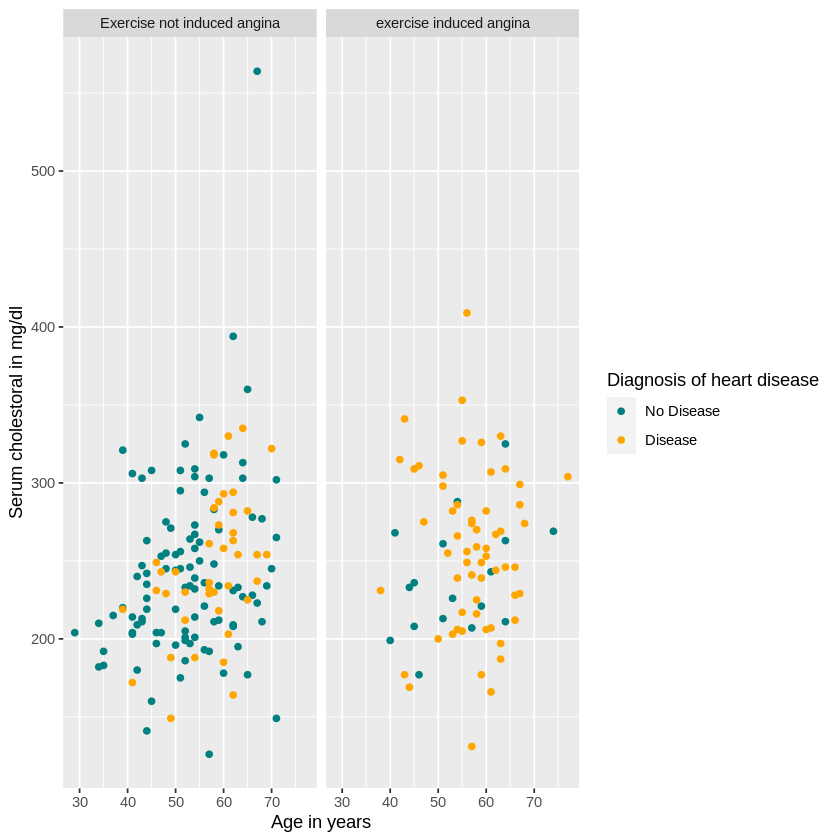

In [9]:
hd_chol_s_plot <- ggplot(hd_training, aes(x = age, y = chol, group = condition, color = condition)) +
             geom_point() +
             labs(x = "Age in years", y = "Serum cholestoral in mg/dl", colour = "Diagnosis of heart disease") +
             facet_grid(cols = vars(exang), labeller = labeller(exang = c("0" = "Exercise not induced angina", "1" = "exercise induced angina"))) +
             scale_color_manual(labels = c("0" = "No Disease", "1" = "Disease"), values = c("#008080", "#FFA500"))
hd_chol_s_plot

The presence of angina triggers heart disease more across different cholesterol levels. 

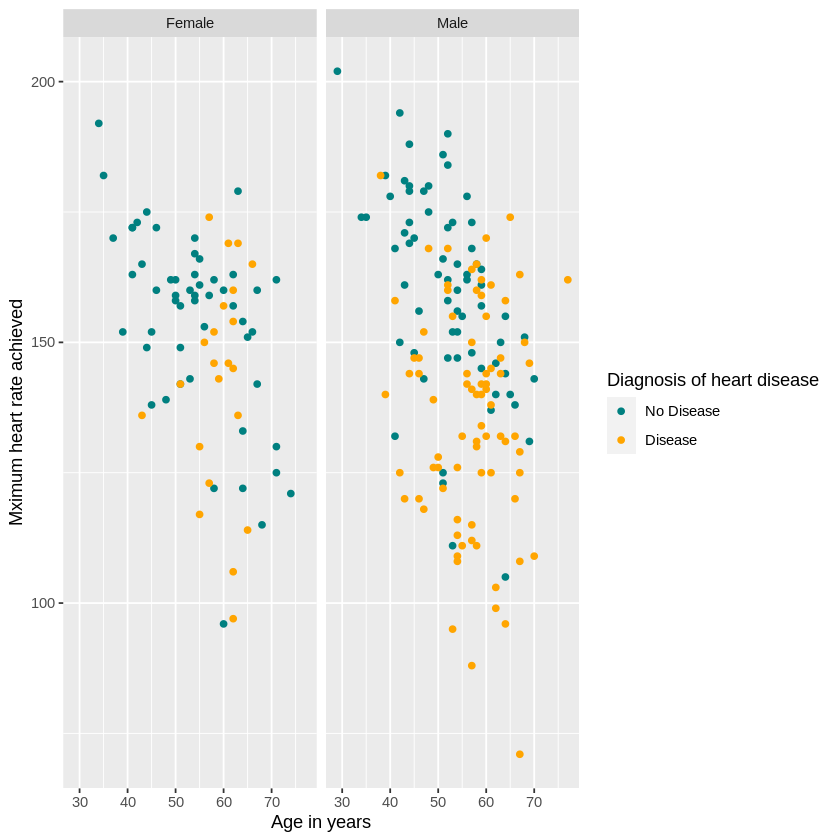

In [10]:
hd_mhra_plot <- ggplot(hd_training, aes(x = age, y = thalach, group = condition, color = condition)) +
             geom_point() +
             labs(x = "Age in years", y = "Mximum heart rate achieved", colour = "Diagnosis of heart disease") +
             facet_grid(cols = vars(sex), labeller = labeller(sex = c("1" = "Male", "0" = "Female"))) +
             scale_color_manual(labels = c("0" = "No Disease", "1" = "Disease"), values = c("#008080", "#FFA500"))
hd_mhra_plot

For males, older age and lower maximum heart rate is more likely to lead to heart disease.

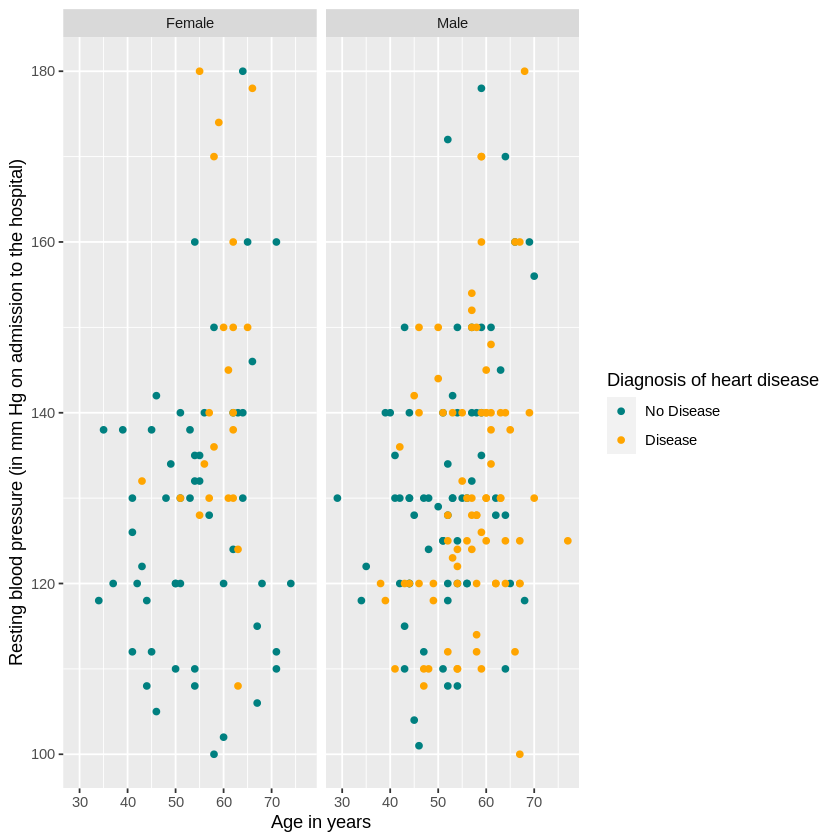

In [11]:
hd_rbp_plot <- ggplot(hd_training, aes(x = age, y = trestbps, group = condition, color = condition)) +
             geom_point() +
             labs(x = "Age in years", y = "Resting blood pressure (in mm Hg on admission to the hospital)", colour = "Diagnosis of heart disease") +
             facet_grid(cols = vars(sex), labeller = labeller(sex = c("1" = "Male", "0" = "Female"))) +
             scale_color_manual(labels = c("0" = "No Disease", "1" = "Disease"), values = c("#008080", "#FFA500"))
hd_rbp_plot

Higher resting blood pressure seems to impact heart disease diagnosis for both males and females.

#### Training the model

In [12]:
set.seed(41)

hd_recipe <- recipe(condition ~ age + sex + trestbps + chol + thalach + exang, data = hd_training) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

training_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

vfold <- vfold_cv(hd_training, v = 5, strata = condition)

In [13]:
set.seed(41)

training_workflow_1 <- workflow() |>
                    add_recipe(hd_recipe) |>
                    add_model(training_spec) |>
                    tune_grid(resamples = vfold, grid = tibble(neighbors = seq(1, 101, 5))) |>
                    collect_metrics()

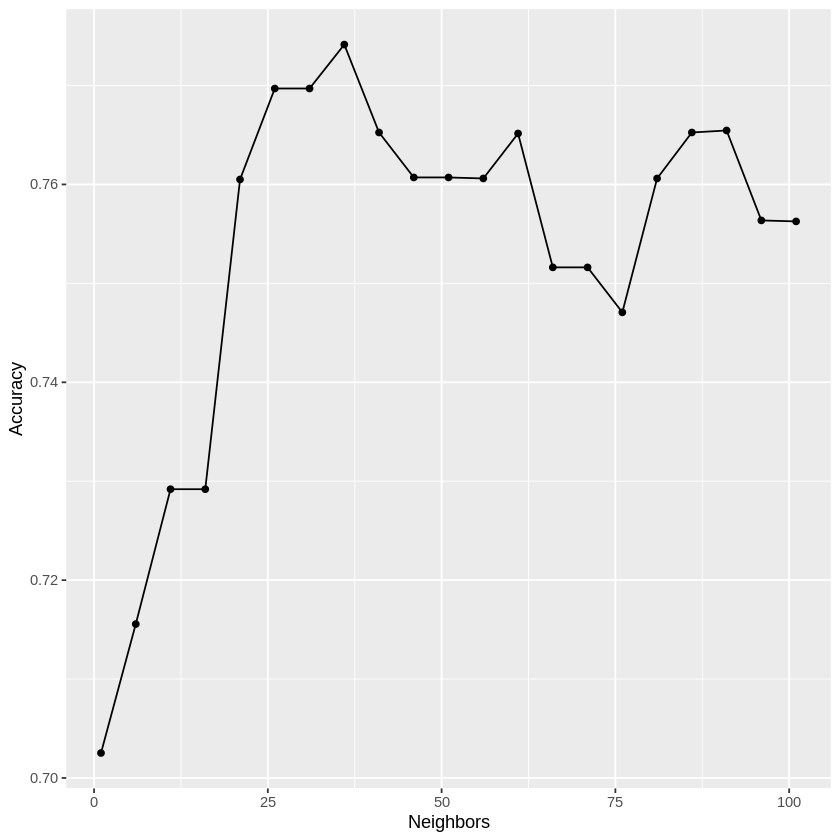

In [14]:
accuracy_plot_1 <- training_workflow_1 |>
              filter(.metric == "accuracy") |>
              ggplot(aes(x = neighbors, y = mean)) +
              geom_point() +
              geom_line() +
              labs(x = "Neighbors", y = "Accuracy")

accuracy_plot_1

In [15]:
k_1 <- training_workflow_1 |>
       filter(.metric == "accuracy") |>
       filter(mean == max(mean)) |>
       pull(neighbors)

k_1

[1] 36

In [16]:
set.seed(41)

training_workflow_2 <- workflow() |>
                    add_recipe(hd_recipe) |>
                    add_model(training_spec) |>
                    tune_grid(resamples = vfold, grid = tibble(neighbors = seq((k_1 - 10), (k_1 + 10), 1))) |>
                    collect_metrics()

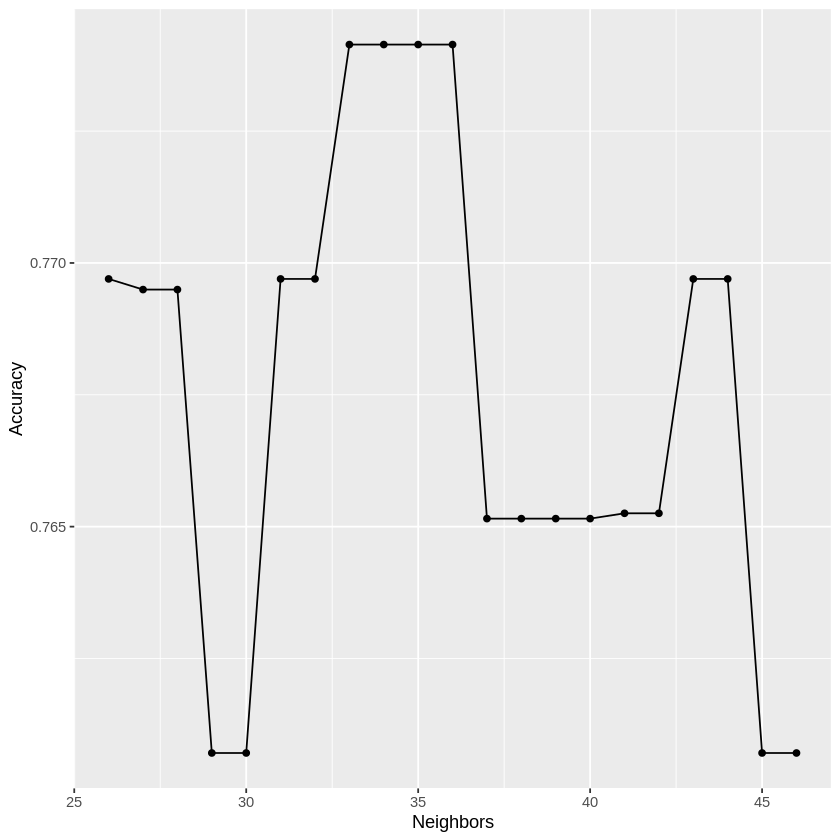

In [17]:
accuracy_plot_2 <- training_workflow_2 |>
                filter(.metric == "accuracy") |>
                ggplot(aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "Accuracy")

accuracy_plot_2

In [18]:
k <- training_workflow_2 |>
       filter(.metric == "accuracy") |>
       filter(mean == max(mean)) |>
       pull(neighbors)

k

[1] 33 34 35 36

In [19]:
set.seed(41)

hd_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 33) |>
           set_engine("kknn") |>
           set_mode("classification")

In [20]:
set.seed(41)

hd_fit <- workflow() |>
       add_recipe(hd_recipe) |>
       add_model(hd_spec) |>
       fit(data = hd_training)

#### Prediction and Result Analysis

In [21]:
set.seed(41)

hd_pred <- predict(hd_fit, hd_testing) |>
        bind_cols(hd_testing)

In [22]:
hd_metrics <- hd_pred |>
           metrics(truth = condition, estimate = .pred_class) |>
           filter(.metric == "accuracy") |>
           select(.estimate)

hd_metrics

.estimate
<dbl>
0.6933333


In [23]:
hd_conf_mat <- hd_pred |>
            conf_mat(truth = condition, estimate = .pred_class)

hd_conf_mat

          Truth
Prediction  0  1
         0 35 18
         1  5 17

#### Visualization of Prediction on Original Data

In [24]:
prediction <- predict(hd_fit, clean_data) |>
           bind_cols(clean_data)

In [25]:
hd_accuracy <- prediction |>
            mutate(accurate = .pred_class == condition) |>
            mutate(accurate = as_factor(accurate))

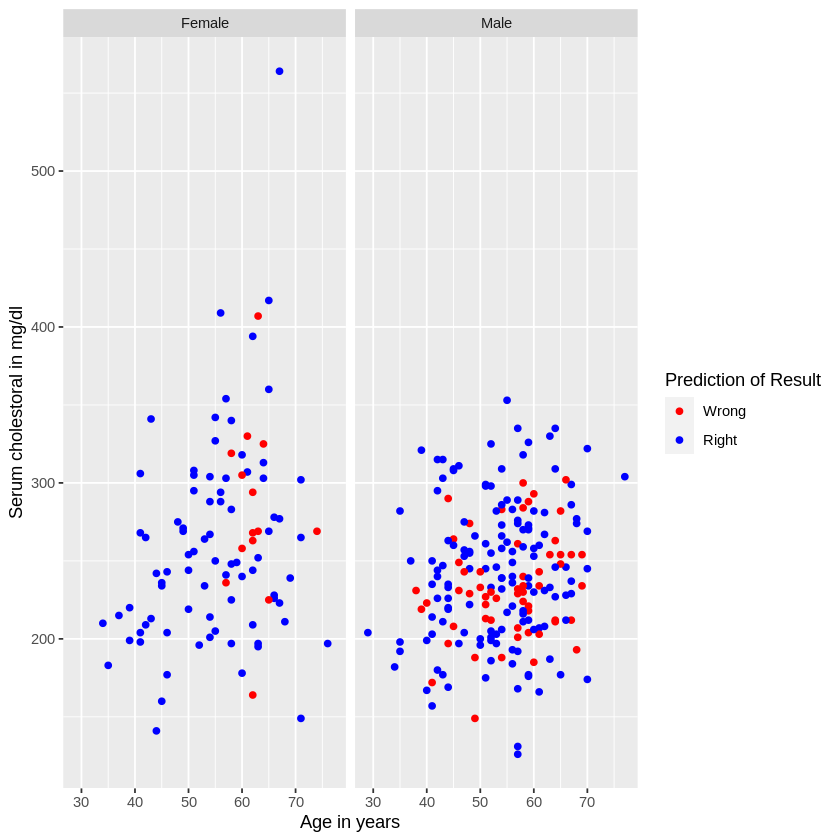

In [26]:
hd_accuracy_plot <- ggplot(hd_accuracy, aes(x = age, y = chol, group = accurate, color = accurate)) +
                 geom_point() +
                 labs(x = "Age in years", y = "Serum cholestoral in mg/dl", colour = "Prediction of Result") +
                 facet_grid(cols = vars(sex), labeller = labeller(sex = c("1" = "Male", "0" = "Female"))) +
                 scale_color_manual(labels = c("TRUE" = "Right", "FALSE" = "Wrong"), values = c("Red", "Blue"))
hd_accuracy_plot

### Discussion

### References